In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None)

### V1 EDA and Model Training

In [27]:
v1_train = pd.read_csv("v1_train.csv")
v1_test = pd.read_csv("v1_test.csv")
v1_train.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,total_lift
0,37133.0,Robin Johnson,North West,CrossFit Wenatchee,CrossFit Wenatchee,Female,45.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1675.0,110.0,75.0,235.0,155.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,2-4 years|,575.0
1,101981.0,Brad Hillard,Central East,NaN,Lake State CrossFit,Male,33.0,69.0,214.0,157.0,478.0,170.0,NaN,NaN,NaN,NaN,265.0,205.0,425.0,435.0,36.0,I eat quality foods but don't measure the amou...,I workout mostly at a CrossFit Affiliate|I wri...,I played youth or high school level sports|I r...,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I do multipl...,2-4 years|,1330.0
2,493083.0,Mark Bredenbeck,Australia,CrossFit Dunedin,CrossFit Dunedin,Male,42.0,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,134688.0,Holly Stave,NaN,NaN,NaN,Female,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,252441.0,Victoria Buls,North West,Big Mountain CrossFit,Big Mountain CrossFit,Female,16.0,69.0,146.0,330.0,NaN,285.0,NaN,318.0,NaN,NaN,133.0,103.0,243.0,188.0,25.0,I weigh and measure my food|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a week|,1-2 years|,667.0


In [28]:
print("Shape:", v1_train.shape)
print("\nData Types:\n", v1_train.dtypes)
print("\nMissing Values:\n", v1_train.isnull().sum())
print("\nSummary Statistics:\n")
display(v1_train.describe(include='all').T)


Shape: (338404, 28)

Data Types:
 athlete_id    float64
name           object
region         object
team           object
affiliate      object
gender         object
age           float64
height        float64
weight        float64
fran          float64
helen         float64
grace         float64
filthy50      float64
fgonebad      float64
run400        float64
run5k         float64
candj         float64
snatch        float64
deadlift      float64
backsq        float64
pullups       float64
eat            object
train          object
background     object
experience     object
schedule       object
howlong        object
total_lift    float64
dtype: object

Missing Values:
 athlete_id         1
name           73663
region        137765
team          214680
affiliate     145231
gender         73663
age            73663
height        210592
weight        154699
fran          294076
helen         314267
grace         305852
filthy50      322897
fgonebad      314768
run400        320645
run

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
athlete_id,338403.0,NaN,NaN,NaN,292519.716344,184941.751564,82.0,134733.5,275603.0,472901.5,633083.0
name,264741,248041,Jason Smith,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,200639,17,Europe,20903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
team,123724,4524,CrossFit NYC,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
affiliate,193173,9655,Unaffiliated,2647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,264741,3,Male,155933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,264741.0,NaN,NaN,NaN,32.516354,7.734258,13.0,27.0,31.0,37.0,125.0
height,127812.0,NaN,NaN,NaN,68.164961,23.17936,0.0,66.0,69.0,72.0,7087.0
weight,183705.0,NaN,NaN,NaN,170.945168,62.679715,1.0,145.0,170.0,192.0,20175.0
fran,44328.0,NaN,NaN,NaN,766.804819,57499.188334,1.0,215.0,290.0,392.0,8388607.0


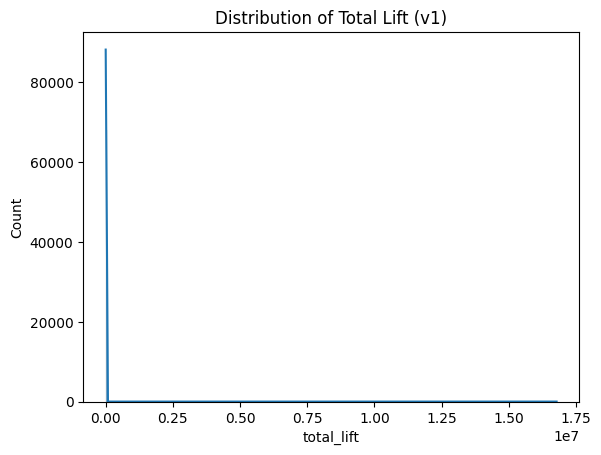

In [29]:
sns.histplot(v1_train["total_lift"], kde=True)
plt.title("Distribution of Total Lift (v1)")
plt.show()

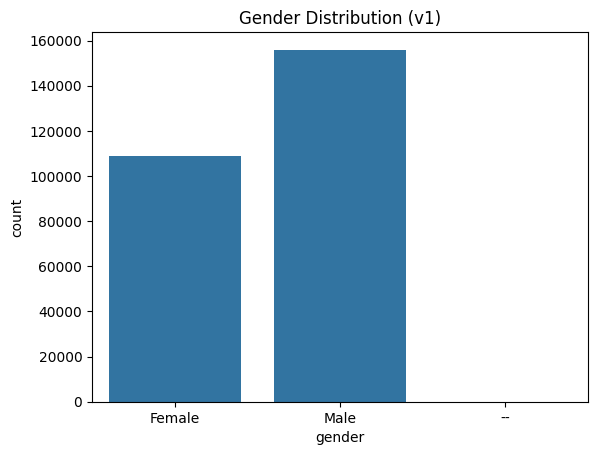

In [30]:
# Gender count
sns.countplot(data=v1_train, x="gender")
plt.title("Gender Distribution (v1)")
plt.show()

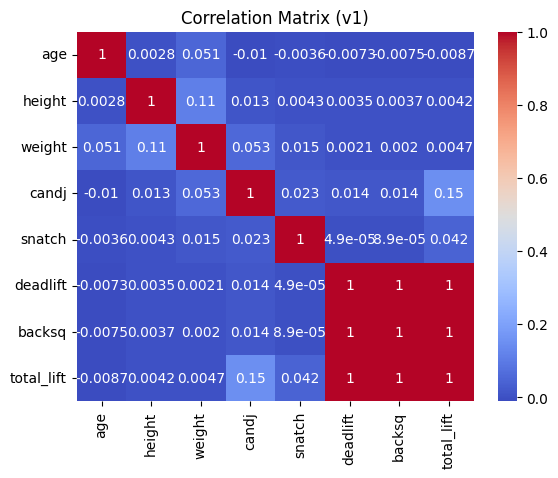

In [31]:
# Correlation heatmap
numeric_features = ['age', 'height', 'weight', 'candj', 'snatch', 'deadlift', 'backsq', 'total_lift']
corr = v1_train[numeric_features].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (v1)")
plt.show()

In [37]:
features = ['age', 'height', 'weight']
target = 'total_lift'

# TRAIN SET
v1_train_filtered = v1_train[features + [target]].dropna()
X_train = v1_train_filtered[features]
y_train = v1_train_filtered[target]

# TEST SET
v1_test_filtered = v1_test[features + [target]].dropna()
X_test = v1_test_filtered[features]
y_test = v1_test_filtered[target]

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"v1 Model MSE: {mse:.2f}")
print(f"v1 Model R² Score: {r2:.2f}")

v1 Model MSE: 1615429248071.64
v1 Model R² Score: -15.31


### V2 EDA and Model Training

In [38]:
v2_train = pd.read_csv("v2_train.csv")
v2_test = pd.read_csv("v2_test.csv")
v2_train.head()

,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,background,experience,schedule,howlong,total_lift
0,Mid Atlantic,Male,27.0,70.0,190.0,260.0,200.0,455.0,345.0,I eat strict Paleo|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 3+ times a wee...,1-2 years|,1260.0
1,Canada East,Male,33.0,72.0,190.0,215.0,180.0,355.0,265.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|,1-2 years|,1015.0
2,Canada West,Female,36.0,65.0,186.0,140.0,100.0,210.0,185.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I typically ...,1-2 years|,635.0
3,North Central,Female,35.0,60.0,105.0,85.0,50.0,175.0,125.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I strictly s...,1-2 years|,435.0
4,South Central,Male,34.0,78.0,197.0,269.0,214.0,450.0,357.0,I eat strict Paleo|I eat quality foods but don...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,4+ years|,1290.0


In [39]:
print("Shape:", v2_train.shape)
print("\nData Types:\n", v2_train.dtypes)
print("\nMissing Values:\n", v2_train.isnull().sum())
print("\nSummary Statistics:\n")
display(v2_train.describe(include='all').T)


Shape: (24012, 15)

Data Types:
 region         object
gender         object
age           float64
height        float64
weight        float64
candj         float64
snatch        float64
deadlift      float64
backsq        float64
eat            object
background     object
experience     object
schedule       object
howlong        object
total_lift    float64
dtype: object

Missing Values:
 region        0
gender        0
age           0
height        0
weight        0
candj         0
snatch        0
deadlift      0
backsq        0
eat           0
background    0
experience    0
schedule      0
howlong       0
total_lift    0
dtype: int64

Summary Statistics:



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
region,24012,17,South East,2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,24012,2,Male,17493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,24012.0,NaN,NaN,NaN,32.134683,7.442858,18.0,27.0,31.0,37.0,56.0
height,24012.0,NaN,NaN,NaN,68.882184,3.780049,52.0,66.0,69.0,72.0,83.0
weight,24012.0,NaN,NaN,NaN,177.174621,32.383206,28.0,155.0,178.0,197.0,474.0
candj,24012.0,NaN,NaN,NaN,205.421414,58.636966,1.0,160.0,205.0,245.0,390.0
snatch,24012.0,NaN,NaN,NaN,156.15234,48.855813,1.0,120.0,155.0,190.0,386.0
deadlift,24012.0,NaN,NaN,NaN,361.940197,96.327377,1.0,287.0,375.0,430.0,1000.0
backsq,24012.0,NaN,NaN,NaN,294.054389,84.974258,1.0,225.0,300.0,355.0,882.0
eat,24012,39,I eat quality foods but don't measure the amount|,11178,NaN,NaN,NaN,NaN,NaN,NaN,NaN


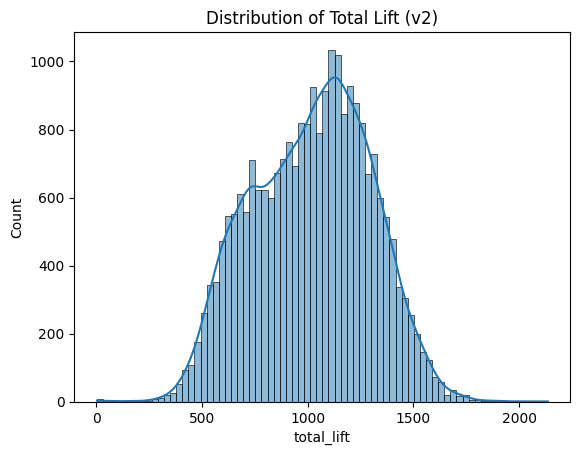

In [40]:
sns.histplot(v2_train["total_lift"], kde=True)
plt.title("Distribution of Total Lift (v2)")
plt.show()

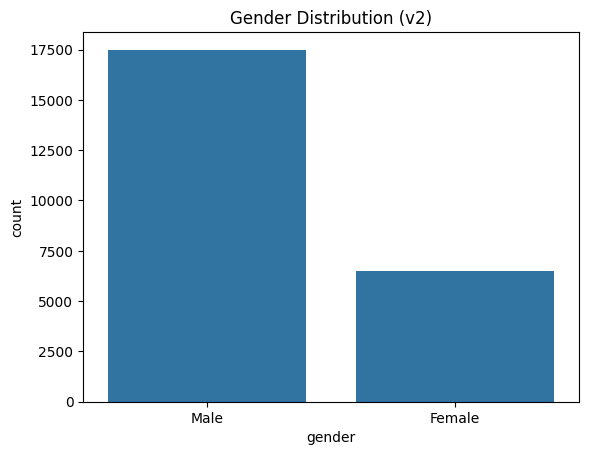

In [41]:
# Gender count
sns.countplot(data=v2_train, x="gender")
plt.title("Gender Distribution (v2)")
plt.show()

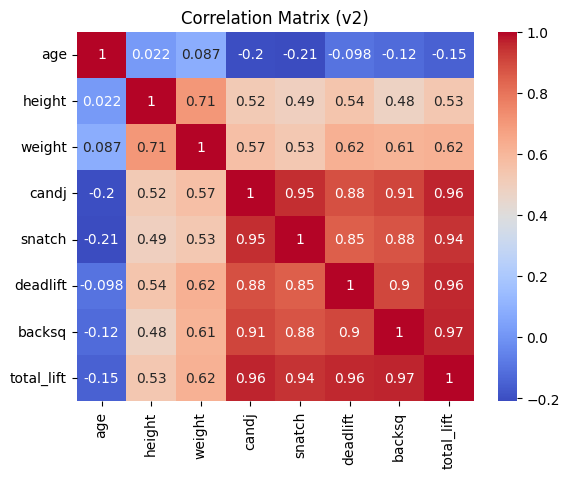

In [42]:
# Correlation heatmap
numeric_features = ['age', 'height', 'weight', 'candj', 'snatch', 'deadlift', 'backsq', 'total_lift']
corr = v2_train[numeric_features].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (v2)")
plt.show()

In [43]:
features = ['age', 'height', 'weight']
target = 'total_lift'

# TRAIN SET
v2_train_filtered = v2_train[features + [target]].dropna()
X_train = v2_train_filtered[features]
y_train = v2_train_filtered[target]

# TEST SET
v2_test_filtered = v2_test[features + [target]].dropna()
X_test = v2_test_filtered[features]
y_test = v2_test_filtered[target]

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"v2 Model MSE: {mse:.2f}")
print(f"v2 Model R² Score: {r2:.2f}")

v2 Model MSE: 43620.04
v2 Model R² Score: 0.44


### Model Comparison: v1 vs v2

| Version | MSE             | R² Score |
|---------|------------------|----------|
| v1      | 1.6e+12          | -15.31   |
| v2      | 43,620.04        | 0.44     |

**Conclusion:**  
Cleaning and preprocessing in v2 led to a significant drop in error and improved predictive power. Data quality has a major impact on model performance.